# Credit Card Fraud Detection
**Author:** Rohan Waghmare

## What is Credit Card Fraud?
Credit card fraud is a type of fraud where someone illegally uses another person's credit card details to make unauthorized transactions. This can lead to financial losses for both the cardholder and the credit card company. Identifying fraudulent transactions quickly is important to prevent financial harm.

## Purpose of this Project
The main purpose of this project is to create a machine learning model that can detect fraud credit card transactions. By analyzing past transactions, the model will learn to distinguish between legitimate and fraud activities. This will help credit card companies protect their customers from fraud.

## Tools and Technologies Used
- **Language:** Python
- **Frameworks and Libraries:** 
  - Pandas and NumPy for Data Manipulation
  - Scikit-learn for Machine Learning
  - Matplotlib and Seaborn for Data Visualization
- **Tool:** Jupyter Notebook in VS Code (for running code and visualizing data)
- **Dataset Source:** Kaggle.com 


## Table of Contents
1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Model Training and Evaluation](#model-training-and-evaluation)
5. [Handling Class Imbalance](#handling-class-imbalance)
7. [Conclusion](#conclusion)

## 1. Introduction
- This project aims to detect credit card fraud using a machine learning model. 
- The dataset contains transactions labeled as fraudulent or non-fraudulent.

## 2. Data Preprocessing
- **Import Libraries**: Import necessary libraries for data analysis and machine learning.
- **Load Data**: Load the credit card transactions dataset.
- **Explore Data**: Display the first few rows, check column names, and summary statistics.
- **Check for Missing Values**: Inspect the dataset for any missing values.

### 2.1 Import Libraries

In [15]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and array handling

import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization

from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # For building the classification model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For evaluating the model



### 2.2 Loading the Data

In [2]:
# Load the dataset
fraud = pd.read_csv(r'C:\Users\Rohan\Desktop\DS Intern @CodSoft\T5 - Credit Card Fraud Detection\creditcard.csv')
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 2.3 Exploring the Data

In [3]:
# Display the first few rows
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Display summary statistics
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.4 Checking the missing value

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check for missing values
fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 3. Exploratory Data Analysis (EDA)
- It's important to analyze the distribution of fraud vs non-fraud transactions to understand the data better. 
- Fraudulent transactions are usually a small portion of the total.

- **Correlation Matrix**: Analyze feature correlations.
- **Distribution of 'Class' Feature**: Visualize the distribution of fraud vs non-fraud transactions.
- **Histograms for Numerical Features**: Plot histograms for numerical features.

In [7]:
# Display data types
fraud.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### 3.1 Correlation Matrix

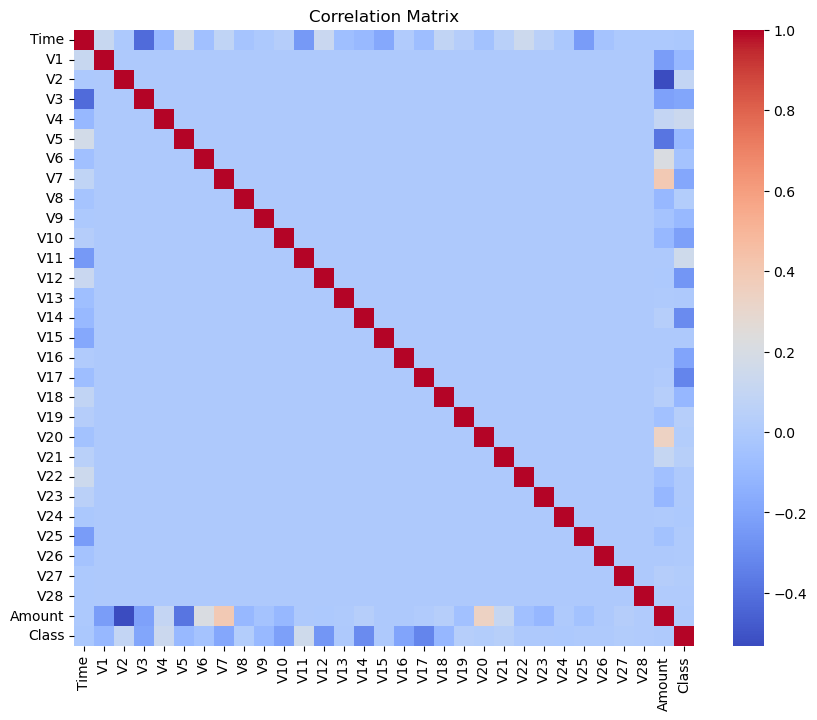

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(fraud.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 3.2 Distribution of 'Class' Feature

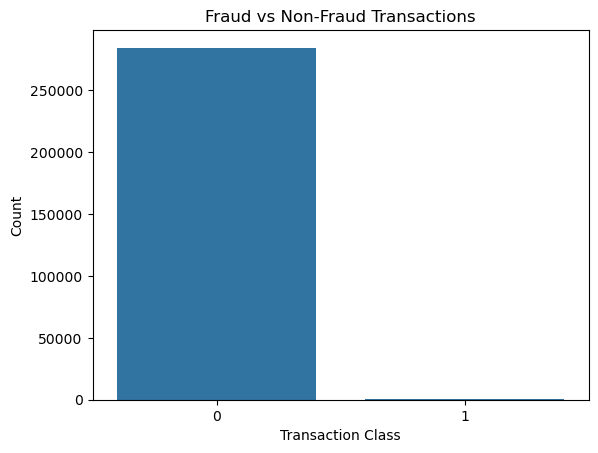

In [9]:
# Plot distribution of the 'Class' feature

# Distribution of fraud vs non-fraud transactions
sns.countplot(x='Class', data=fraud)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

### 3.3 Histograms for Numerical Features

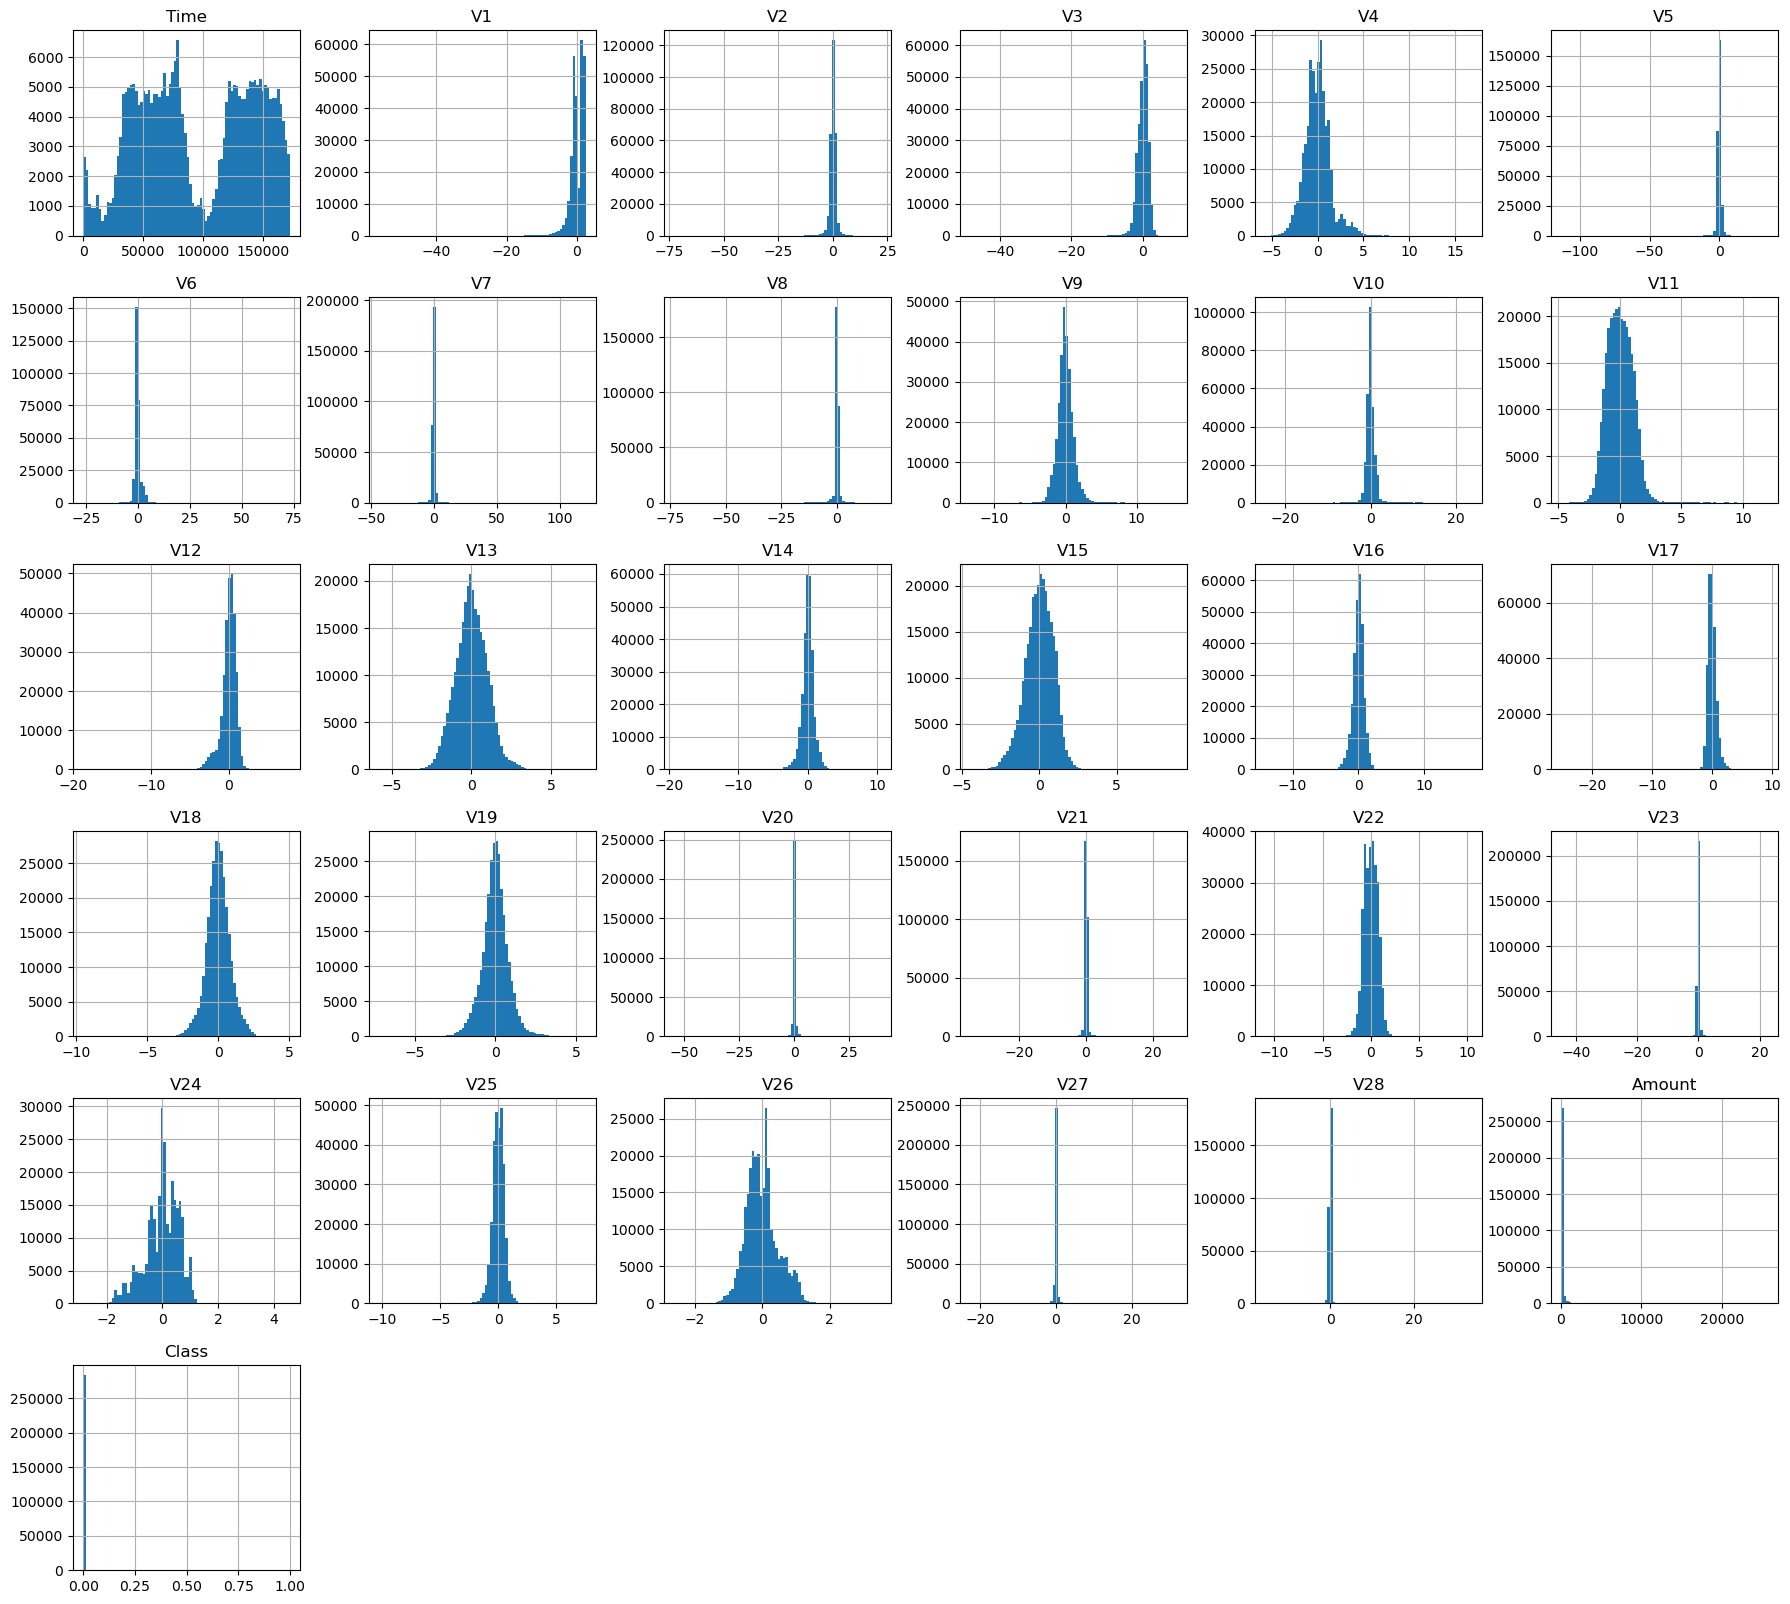

In [10]:
# Plot histograms for numerical features
fraud.hist(figsize=(22, 20), bins=80)
plt.show()

## 4. Model Training and Evaluation
- **Train-Test Split**: Split the dataset into training and testing sets.
- **Train & Evaluate Model**: Use RandomForestClassifier for training. Assess the model's performance using accuracy score, classification report, and confusion matrix.


In [11]:
# Separating the features and target
X = fraud.drop(columns='Class')  # Features
y = fraud['Class']  # Target (Fraud/Non-Fraud)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 4.1 Train-Test Split:
- Split the dataset into training and testing sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### 4.2 Train & Evaluate Model:
- Evaluate the model using confusion matrix, classification report, and accuracy score.
- A popular choice for fraud detection is RandomForestClassifier due to its robustness with imbalanced data.

Accuracy Score: 0.9996137776061234
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



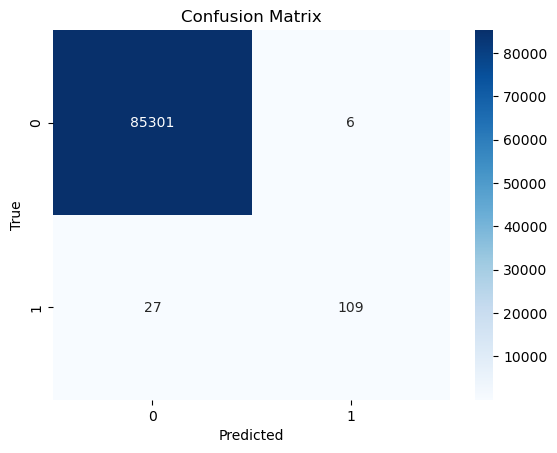

In [13]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



## 5. Handling Class Imbalance
- You can use SMOTE (Synthetic Minority Over-sampling Technique) to deal with the imbalance.
- **SMOTE**: Apply SMOTE to address class imbalance by oversampling the minority class.


In [14]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model again with the resampled dataset
rf_classifier.fit(X_resampled, y_resampled)
y_pred_resampled = rf_classifier.predict(X_test)

# Evaluate the model with resampled data
print("Accuracy Score (SMOTE):", accuracy_score(y_test, y_pred_resampled))
print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred_resampled))



Accuracy Score (SMOTE): 0.9995084442259752
Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## 6. Conclusion
- The project successfully covers data preprocessing, EDA, model training, and evaluation. 
- Handling class imbalance is addressed with SMOTE.